In [887]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from matplotlib.patches import Patch
output = "./OUTPUT/"
os.makedirs(output,exist_ok=True)


In [888]:
dados = pd.read_csv("dados_limpos.csv",sep=",",decimal=".")
dados = dados.drop('customerID', axis =1)

In [889]:
x = dados.drop('Churn', axis =1)
y = dados['Churn']
dados_colunas = x.columns

dados_x = x.copy()

<h1>Econding: one-hot </h1>


In [890]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [891]:
label_ecoder = LabelEncoder()
y = label_ecoder.fit_transform(y)

In [892]:

colunas_categoricas = x.select_dtypes(include='object').columns # pegar as categoricas


one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough',
    sparse_threshold=0)

x = one_hot_enc.fit_transform(x)


dados_encode=pd.DataFrame(x, columns = one_hot_enc.get_feature_names_out(dados_colunas))
dados_encode["Churn"] = y
dados_encode.to_csv("dados_encode.csv",sep=",",decimal=".",index=False); # Para Analise


In [893]:
print(y,x)

[0 0 1 ... 0 0 0] [[1.0 0.0 1.0 ... 65.6 593.3 2.1866666666666665]
 [0.0 1.0 1.0 ... 59.9 542.4 1.9966666666666664]
 [0.0 1.0 0.0 ... 73.9 280.85 2.4633333333333334]
 ...
 [0.0 1.0 1.0 ... 50.3 92.75 1.6766666666666663]
 [0.0 1.0 1.0 ... 67.85 4627.65 2.2616666666666663]
 [0.0 1.0 1.0 ... 59.0 3707.6 1.9666666666666663]]


<h1>Proporção Chrun</h1>

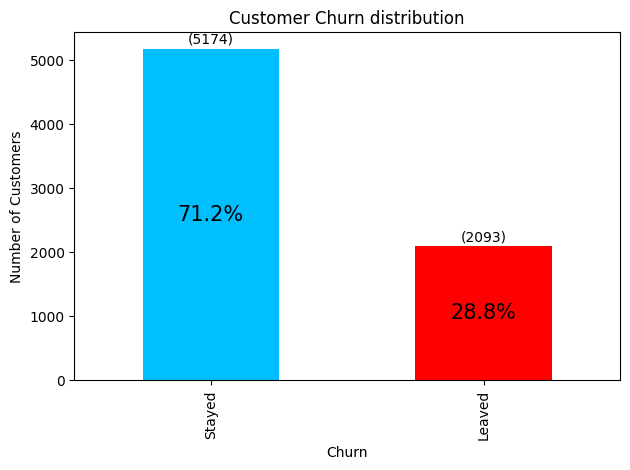

Churn
False    5174
True     2093
Name: count, dtype: int64

In [894]:

count = dados.value_counts("Churn")

total = count.sum()


count.plot(kind='bar',color=["deepskyblue","red"]) 
plt.ylabel("Number of Customers")
plt.xlabel("Churn")
plt.title("Customer Churn distribution")
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Leaved'])

for i, (valor) in enumerate(count):
    porcentagem = f"{(valor / total) * 100:.1f}%"
    plt.text(i,  valor * 0.5, f"{porcentagem}", ha='center', va='center', fontsize=15)
    plt.text(i,  valor + total * 0.02, f"({valor})", ha='center', va='center', fontsize=10)
plt.tight_layout()
plt.savefig("OUTPUT/churn_distribution")
plt.show()


count


<h1>Divisão de Treino,Teste e Validação</h1>

In [895]:

from sklearn.model_selection import train_test_split
if False:
    x, x_teste, y, y_teste = train_test_split(x, y, stratify = y, test_size= 0.15,  random_state = 5)
    x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y,  random_state = 5)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, test_size= 0.3,  random_state = 42)


<h1>Lidando com o desbalanceamento de dados</h1>

In [896]:
#OVERSAMPLING

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_balanceado, y_balanceado = smote.fit_resample(x_treino, y_treino)

#UNDERSAMPLING
from imblearn.under_sampling import NearMiss

underSampling = NearMiss()
x_balanceado2, y_balanceado2 = underSampling.fit_resample(x_treino, y_treino)

print(pd.Series(y_balanceado).value_counts())
print(pd.Series(y_balanceado2).value_counts())




0    3621
1    3621
Name: count, dtype: int64
0    1465
1    1465
Name: count, dtype: int64


<h1>Normalização</h1>

In [897]:
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)
x_teste_normalizado = normalizacao.fit_transform(x_teste)
#x_val_normalizado = normalizacao.fit_transform(x_val)


pd.DataFrame(x_teste_normalizado)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.707171,0.223317,0.707171
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.717131,0.745554,0.717131
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.066733,0.143066,0.066733
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.710159,0.406689,0.710159
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.010956,0.032640,0.010956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.016932,0.002335,0.016932
2177,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.798307,0.602757,0.798307
2178,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.909363,0.716232,0.909363
2179,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.820717,0.665795,0.820717


<h1>Avaliação de Modelos</h1>

In [898]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def score_print(model):
    print(f"Treino :{model.score(x_balanceado, y_balanceado):.2f}%")
    print(f"Teste :{model.score(x_teste, y_teste):.2f}%")
    #print(f"Validação :{model.score(x_val, y_val):.2f}%")

def metricas(y_true, y_pred):
    """ 
    Acurácia
    Precisão
    Recall
    F1-score
    Matriz de confusão
    """
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    print(f"Acurácia:     {acc:.4f}")
    print(f"Precisão:     {prec:.4f}")
    print(f"Recall:       {rec:.4f}")
    print(f"F1-score:     {f1:.4f}")
    print("\nMatriz de Confusão:")
    print(cm)
    print()  

    resultado = {
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-score': f1
    }  
    return resultado

<h1>DecisionTree</h1>

In [899]:

from sklearn.tree import DecisionTreeClassifier




In [900]:
# balanced
modelo_treeDicision = DecisionTreeClassifier(max_depth=5, random_state =5)
modelo_treeDicision.fit(x_balanceado, y_balanceado);

score_print(modelo_treeDicision)


Treino :0.80%
Teste :0.75%


In [901]:
# No balance
modelo2 = DecisionTreeClassifier(max_depth=5, random_state =5)
modelo2.fit(x_treino, y_treino);

score_print(modelo2)


Treino :0.75%
Teste :0.76%


In [902]:
from sklearn.tree import plot_tree

if False:

    plt.figure(figsize = (15, 6))
    plot_tree(modelo_treeDicision, filled = True,fontsize=7 )
    plt.title("Balanced")

    plt.savefig(f"{output}_tree_Balance")
    plt.show()

    plt.tight_layout()

    plt.close()


    plt.figure(figsize = (15, 6))
    plot_tree(modelo2, filled = True,fontsize=7 )
    plt.title("no Balanced")
    plt.tight_layout()
    plt.savefig(f"{output}_tree_No_Balance")
    plt.show()


<h1>RandomForest</h1>

In [903]:

from sklearn.ensemble import RandomForestClassifier

In [904]:

modelo_RandomFores = RandomForestClassifier(max_depth=5, random_state =5)
modelo_RandomFores.fit(x_balanceado, y_balanceado);

score_print(modelo_RandomFores)

Treino :0.83%
Teste :0.74%


<h1>KNN</h1>

In [905]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_treino_normalizado, y_treino)

score_print(knn)
y_prev_knn = knn.predict(x_teste_normalizado)
metricas(y_teste,y_prev_knn)



Treino :0.50%
Teste :0.71%
Acurácia:     0.7354
Precisão:     0.5445
Recall:       0.4968
F1-score:     0.5196

Matriz de Confusão:
[[1292  261]
 [ 316  312]]



{'Acurácia': 0.7354424575882622,
 'Precisão': 0.5445026178010471,
 'Recall': 0.4968152866242038,
 'F1-score': 0.5195670274771024}

<h1>Regressão Logística<h1>

In [906]:
from sklearn.linear_model import LogisticRegression

modelo_log_regression = LogisticRegression(random_state=42, solver='saga')
modelo_log_regression.fit(x_treino_normalizado, y_treino)

y_prev_logreg = modelo_log_regression.predict(x_teste_normalizado)

score_print(modelo_log_regression)

metricas(y_teste,y_prev_logreg)


Treino :0.59%
Teste :0.74%
Acurácia:     0.7703
Precisão:     0.6267
Recall:       0.5000
F1-score:     0.5562

Matriz de Confusão:
[[1366  187]
 [ 314  314]]



{'Acurácia': 0.7702888583218707,
 'Precisão': 0.626746506986028,
 'Recall': 0.5,
 'F1-score': 0.5562444641275465}

<h1>Matrix de Confusão</h1>

In [907]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def matrix_confusion(modelo,file_name="Unamed"):
    y_previsto = modelo.predict(x_teste_normalizado)
    matriz_confusao = confusion_matrix(y_teste, y_previsto) 
    print(file_name)
    print(matriz_confusao)
    visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,display_labels=['Stayed', 'Leaved'])
    visualizacao.plot();
    plt.title(f"Model:{file_name}, Target: Churn")
    plt.savefig(f"{output}ConfusionMatrix_{file_name}")
    




In [908]:
resultados = {}

y_prev_RandomFores = modelo_RandomFores.predict(x_balanceado)
y_prev_treeDicision = modelo_treeDicision.predict(x_balanceado)

resultados['KNN'] = metricas(y_teste,y_prev_knn)
resultados['Logistic Regression'] = metricas(y_teste,y_prev_logreg)
resultados['Random Forest'] =   metricas(y_balanceado,y_prev_RandomFores)
resultados['Decision Tree']= metricas(y_balanceado,y_prev_treeDicision)

df_metricas = pd.DataFrame({
    modelo: {
        'Acurácia': res['Acurácia'],
        'Precisão': res['Precisão'],
        'Recall': res['Recall'],
        'F1-score': res['F1-score']
    } for modelo, res in resultados.items()
}).T.reset_index().rename(columns={'index':'Modelo'})



Acurácia:     0.7354
Precisão:     0.5445
Recall:       0.4968
F1-score:     0.5196

Matriz de Confusão:
[[1292  261]
 [ 316  312]]

Acurácia:     0.7703
Precisão:     0.6267
Recall:       0.5000
F1-score:     0.5562

Matriz de Confusão:
[[1366  187]
 [ 314  314]]

Acurácia:     0.8268
Precisão:     0.8125
Recall:       0.8498
F1-score:     0.8307

Matriz de Confusão:
[[2911  710]
 [ 544 3077]]

Acurácia:     0.8042
Precisão:     0.8561
Recall:       0.7313
F1-score:     0.7888

Matriz de Confusão:
[[3176  445]
 [ 973 2648]]



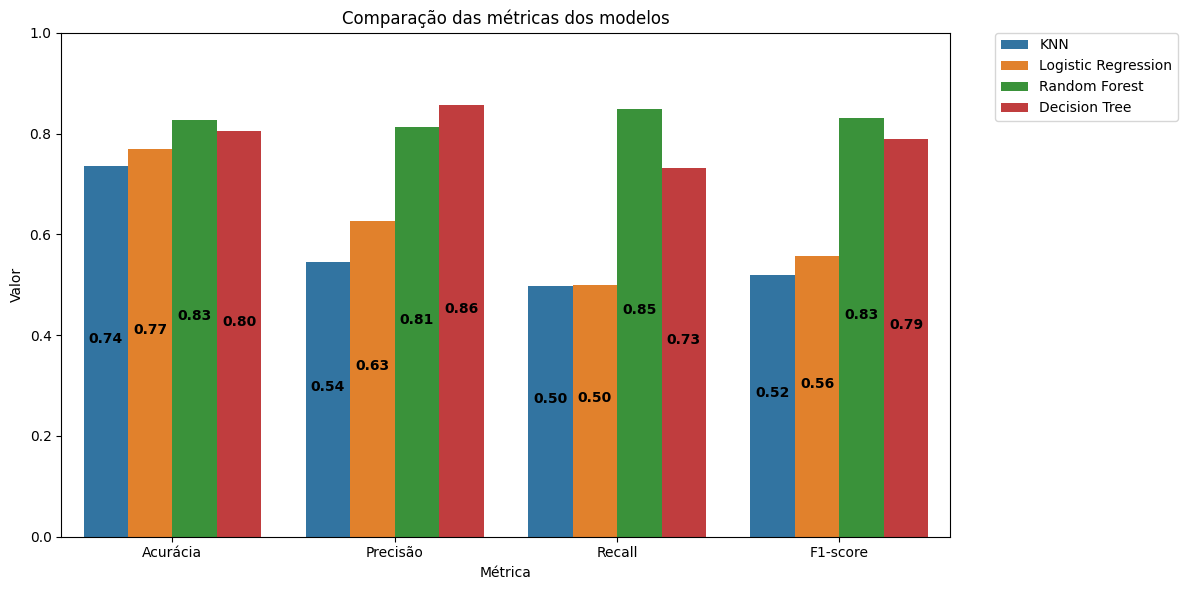

In [909]:

df_long = df_metricas.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')



plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_long, x='Métrica', y='Valor', hue='Modelo')
plt.title('Comparação das métricas dos modelos')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points', fontweight='bold')
plt.tight_layout()
plt.savefig(f"{output}comparacao_modelos_machinelearning")
plt.show()

Decision_Tree
[[1238  315]
 [ 262  366]]
Random_Forest
[[1075  478]
 [ 174  454]]
KNN
[[1292  261]
 [ 316  312]]
Logistic Regression
[[1366  187]
 [ 314  314]]


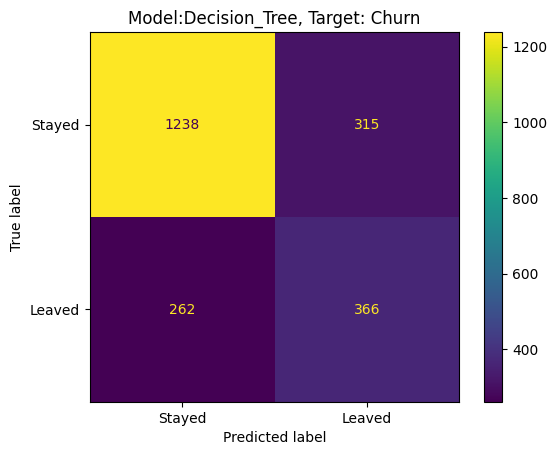

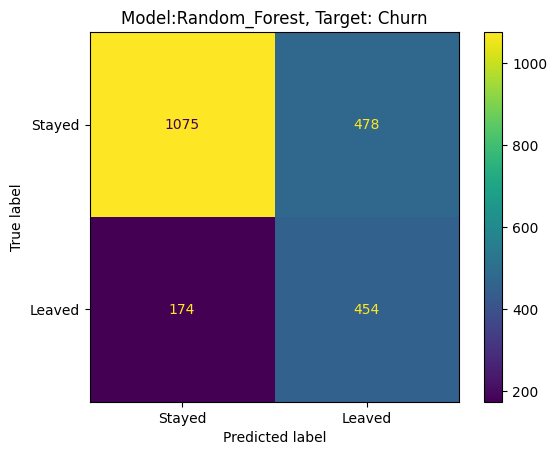

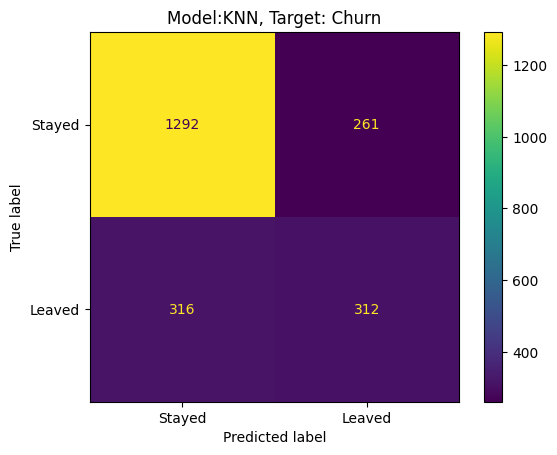

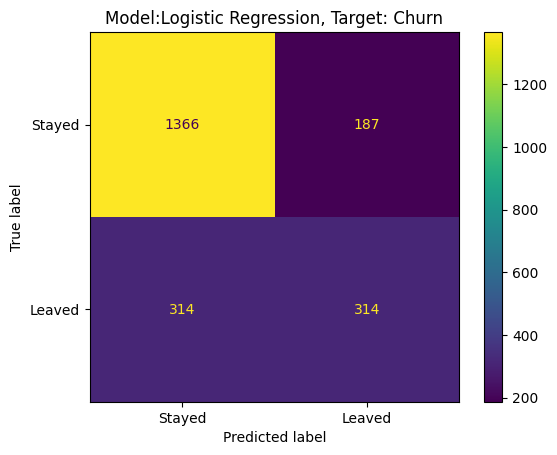

In [910]:
matrix_confusion(modelo_treeDicision,file_name="Decision_Tree")
matrix_confusion(modelo_RandomFores,file_name="Random_Forest")
matrix_confusion(knn,file_name="KNN")
matrix_confusion(modelo_log_regression,file_name="Logistic Regression")



In [911]:
def plot_top10_importances(model, X, model_name=None):

    if hasattr(model, 'coef_'):
        coef = model.coef_[0]
        features = X.columns if hasattr(X, 'columns') else [f'var_{i}' for i in range(len(coef))]

        df = pd.DataFrame({'Variável': features, 'Coeficiente': coef})
        # Pega os 10 coeficientes de maior magnitude (valor absoluto)
        df['abs_coef'] = df['Coeficiente'].abs()
        df_top10 = df.sort_values('abs_coef', ascending=False).head(10).set_index('Variável')

        # Plot horizontal com cores diferentes para positivo e negativo
        colors = ['red' if c < 0 else 'green' for c in df_top10['Coeficiente']]

        plt.figure(figsize=(10,6))
        df_top10['Coeficiente'].plot(kind='barh', color=colors)
        plt.xlabel("Coeficiente")
        plt.title(f"Top 10 Coeficientes com Sinal - {model_name if model_name else 'Modelo'}")
        plt.axvline(0, color='black', linewidth=0.8)
        plt.gca().invert_yaxis()  # para maior coeficiente no topo

        legend_elements = [
            Patch(facecolor='green', edgecolor='black', label='Impacto Positivo'),
            Patch(facecolor='red', edgecolor='black', label='Impacto Negativo')
        ]
        plt.legend(handles=legend_elements,)

        plt.tight_layout()
        plt.savefig(f"{output}{model_name}_importance")
        plt.show()
        print(f"{model_name}\n{df}")
        return
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X.columns if hasattr(X, 'columns') else [f'var_{i}' for i in range(X.shape[1])]
        importance_type = 'Importância'
        importances_abs = importances
        df = pd.DataFrame({'Variável': features, 'Coeficiente': importances_abs})
        print(f"{model_name}\n{df}")

    else:
        print("Este modelo não possui coeficientes nem feature_importances_. Impossível plotar importâncias.")
        return

    # Monta DataFrame e seleciona top 10
    df = pd.DataFrame({'Variável': features, importance_type: importances_abs})
    df_sorted = df.sort_values(by=importance_type, ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(df_sorted['Variável'][::-1], df_sorted[importance_type][::-1], color='skyblue')
    plt.xlabel(importance_type)
    plt.title(f'Top 10 variáveis mais importantes - {model_name if model_name else "Modelo"}')
    plt.tight_layout()
    plt.savefig(f"{output}{model_name}_importance")
    plt.show()

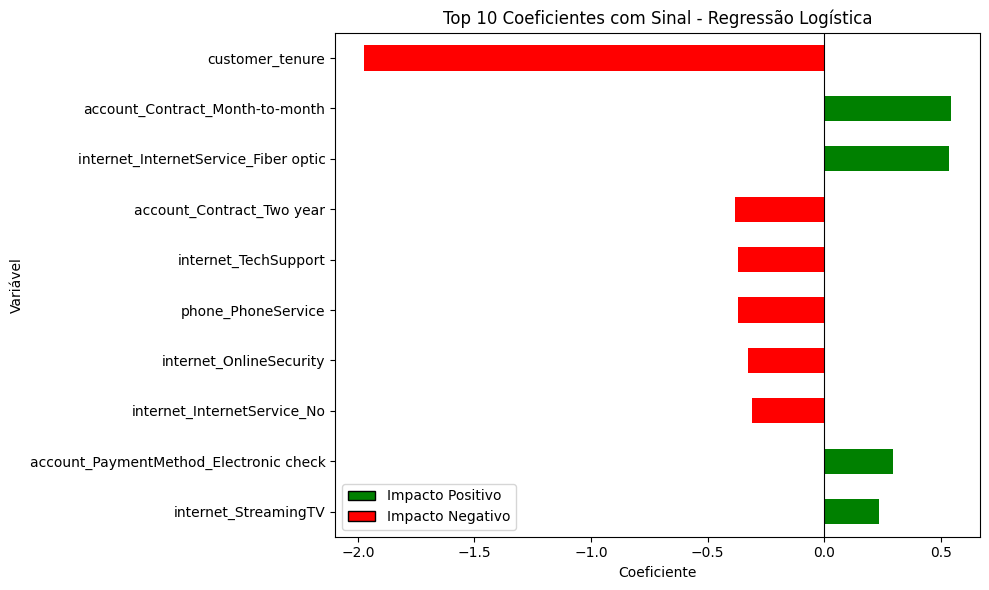

Regressão Logística
                                           Variável  Coeficiente  abs_coef
0                            customer_gender_Female     0.039004  0.039004
1                              customer_gender_Male    -0.050703  0.050703
2                      internet_InternetService_DSL    -0.235197  0.235197
3              internet_InternetService_Fiber optic     0.535006  0.535006
4                       internet_InternetService_No    -0.311507  0.311507
5                   account_Contract_Month-to-month     0.542915  0.542915
6                         account_Contract_One year    -0.170551  0.170551
7                         account_Contract_Two year    -0.384062  0.384062
8   account_PaymentMethod_Bank transfer (automatic)    -0.111272  0.111272
9     account_PaymentMethod_Credit card (automatic)    -0.149838  0.149838
10           account_PaymentMethod_Electronic check     0.294713  0.294713
11               account_PaymentMethod_Mailed check    -0.045301  0.045301
12   

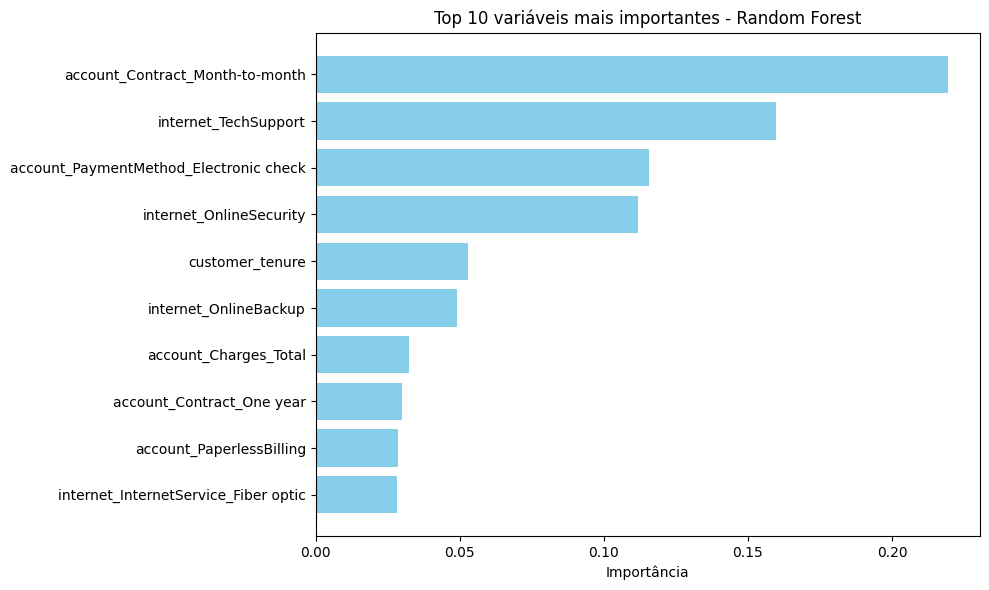

Decision Tree
                                           Variável  Coeficiente
0                            customer_gender_Female     0.000000
1                              customer_gender_Male     0.000000
2                      internet_InternetService_DSL     0.000000
3              internet_InternetService_Fiber optic     0.033032
4                       internet_InternetService_No     0.000000
5                   account_Contract_Month-to-month     0.589107
6                         account_Contract_One year     0.018205
7                         account_Contract_Two year     0.032558
8   account_PaymentMethod_Bank transfer (automatic)     0.000887
9     account_PaymentMethod_Credit card (automatic)     0.000000
10           account_PaymentMethod_Electronic check     0.194559
11               account_PaymentMethod_Mailed check     0.000000
12                           customer_SeniorCitizen     0.003374
13                                 customer_Partner     0.000000
14         

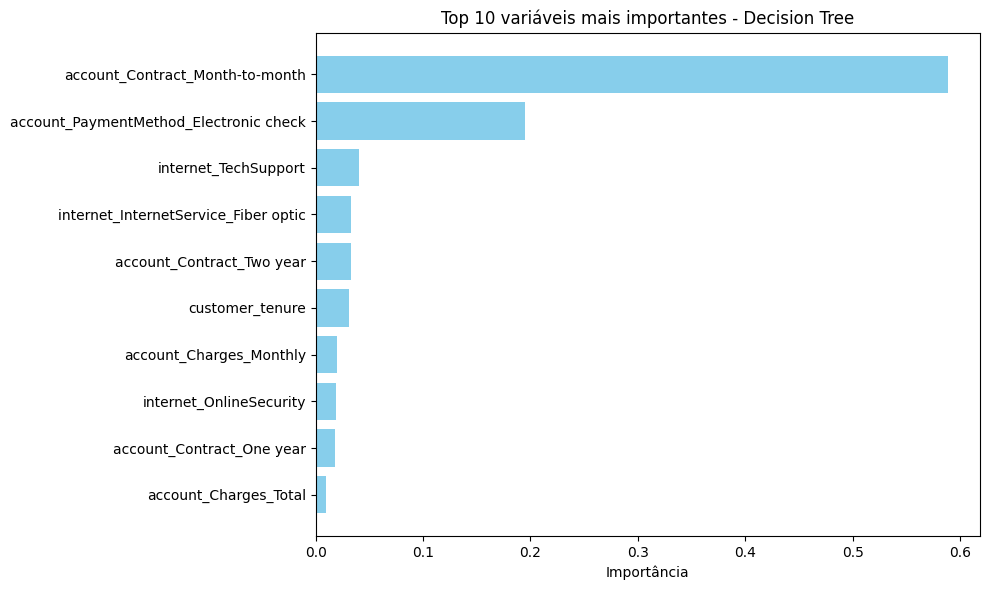

In [912]:

dados_x = dados_encode.drop(["Churn"],axis=1)
dados_x.columns = [col.replace('onehotencoder__', '').replace('remainder__', '') for col in dados_x.columns]

plot_top10_importances(modelo_log_regression, dados_x, model_name='Regressão Logística')

plot_top10_importances(modelo_RandomFores, dados_x, model_name='Random Forest')
plot_top10_importances(modelo_treeDicision, dados_x, model_name='Decision Tree')




<h1> Matriz de Correlação</h1>

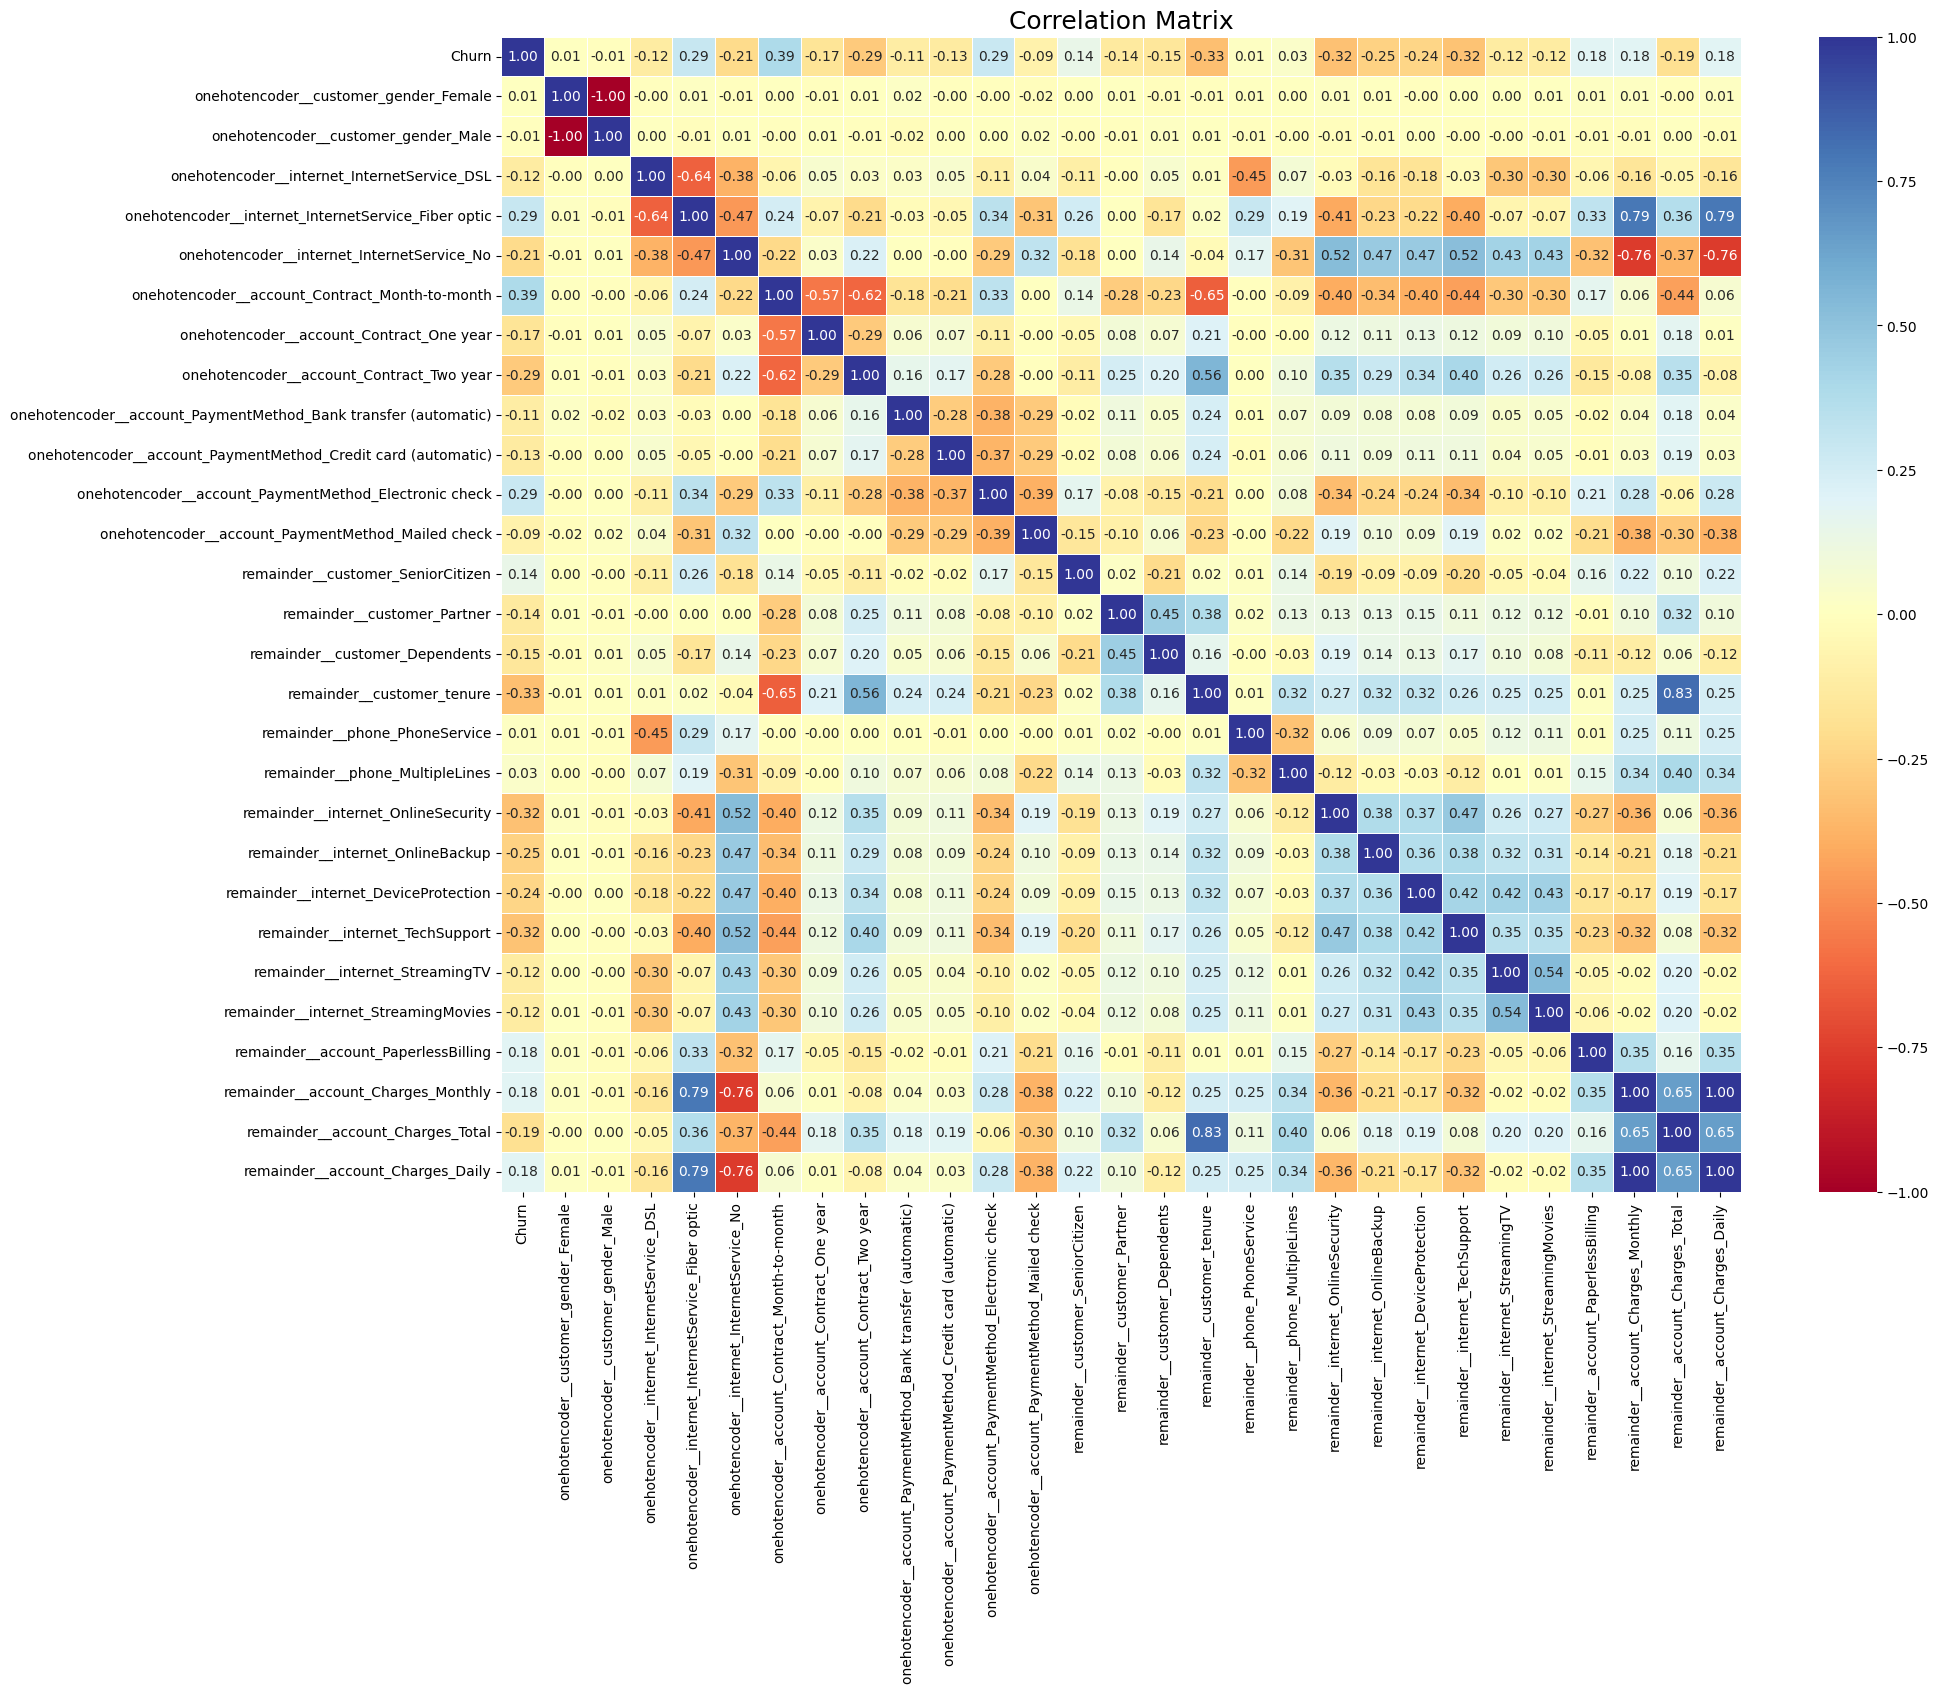

In [913]:
corr_matrix = dados_encode.corr()

target = 'Churn'
cols = [target] + [col for col in corr_matrix.columns if col != target]
corr_matrix = corr_matrix.loc[cols, cols]

plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix,annot=True,cmap='RdYlBu',fmt='.2f',linewidths=.5)

plt.title('Correlation Matrix', fontsize=18)
plt.savefig(f"{output}Correlation_Matrix")
plt.show()

In [ ]:

def calcular_correlação(df_num: pd.DataFrame) -> list[str]:
    df_corr = df_num.corr(numeric_only=False)["Churn"].sort_values(ascending=False)
    df_corr = df_corr[abs(df_corr) > 0.1] # Filtrar 
    df_corr = df_corr[1:]
    
    plt.figure(figsize=(15, 10))
    ax = sns.barplot(x=df_corr.values, y=df_corr.index,  hue=df_corr.values, palette="vlag")
    plt.title("Correlação com a Evasão (Churn)")
    plt.ylabel("")
    plt.xlabel("Nivel de Correlação")

    for i, p in enumerate(ax.patches):
        width = p.get_width()
        if abs(width) != 0: 
            ax.text((width *0.5), p.get_y() + p.get_height() / 2,
                        f"{width:.2f}", va="center")
    legenda = [
        Patch(color="#a35455", label="Correlação positiva: mais chance de evasão"),
        Patch(color="#4d76ac", label="Correlação negativa: menos chance de evasão") 
    ]
    plt.legend(handles=legenda, loc="lower right")
    plt.tight_layout()
    plt.savefig(f"{output}correlation_churn_only.png")
    
    plt.show()

calcular_correlação(dados_encode)

ValueError: could not convert string to float: 'Stayed'

<h1>Análises Direcionadas</h1>
<li>Tempo de contrato × Evasão<br></li><li>Total gasto × Evasão<br></li>

In [915]:
dados_encode["Churn"] = dados_encode["Churn"].map({0: "Stayed", 1: "Leaved"})

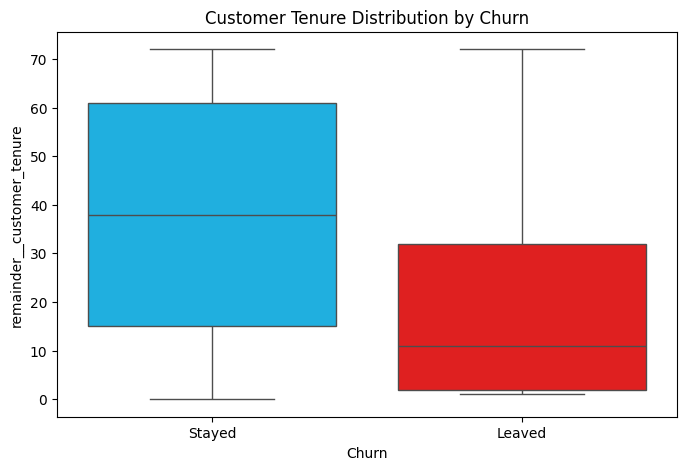

In [916]:
# Scatter e BoxPlot
#remainder__customer_tenure x Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_encode, x="Churn", y="remainder__customer_tenure", hue='Churn', palette=["deepskyblue", "red"])
plt.title("Customer Tenure Distribution by Churn")
plt.savefig(f"{output}Tenure_churn.png")
plt.show()



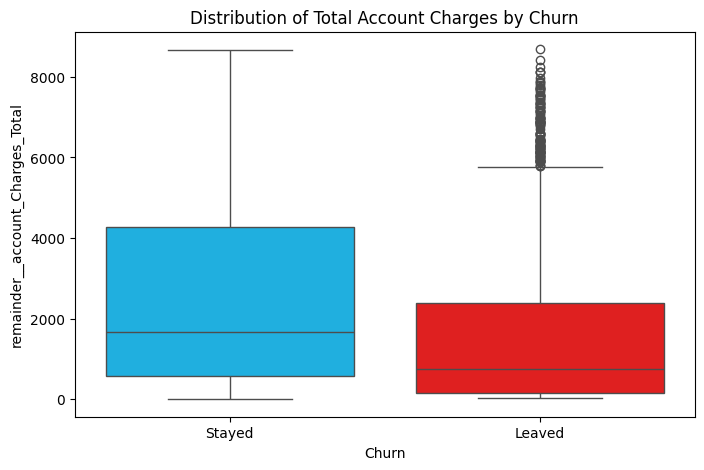

In [917]:
#remainder__account_Charges_Total x Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados_encode, x="Churn", y="remainder__account_Charges_Total", hue='Churn', palette=["deepskyblue", "red"])
plt.title("Distribution of Total Account Charges by Churn")
plt.savefig(f"{output}Charges_churn.png")
plt.show()

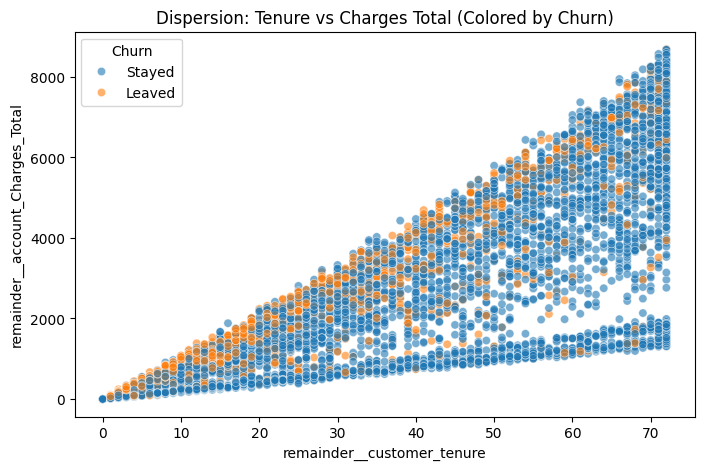

In [918]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dados_encode, x="remainder__customer_tenure", y="remainder__account_Charges_Total", hue="Churn", alpha=0.6)
plt.title("Dispersion: Tenure vs Charges Total (Colored by Churn)")
plt.savefig(f"{output}Charges_ternure_scatter.png")
plt.show()